In [1]:
cd ..

C:\Users\johan\github\designresolver


In [8]:
from testgraph import Ein, Eout, Rin
from graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, VAR, COMP, all_variables, all_components
from mergegraph import split_graph, merged_graph, merge_graph
import matplotlib

In [9]:
G = flat_graph_formulation(Ein, Eout, Rin)

In [10]:
cmap = matplotlib.cm.get_cmap('Pastel1')
def plot_subgraph(G, subgraph):
    colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): all_variables(*subgraph),
        matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
    draw_graph_graphical_props(G, colormap_subgraph, prog='sfdp', figsize=(11,4))

# Merge

In [11]:
typed_mergelts = {Node(3,COMP), Node(5, COMP)}

## Split graph

In [12]:
subgraph, mergegraph = split_graph(G, typed_mergelts)

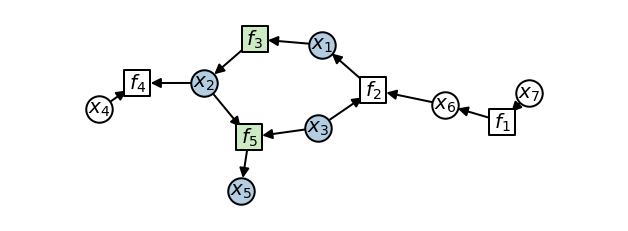

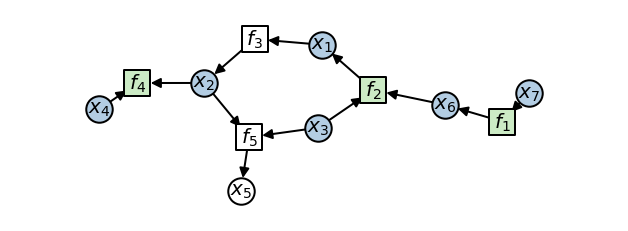

In [13]:
plot_subgraph(G, subgraph)
plot_subgraph(G, mergegraph)

## Generate mergegraph

In [14]:
typed_solve_vars = {Node(3, VAR)}
merged_graph(subgraph, mergegraph, 1, typed_solve_vars)

[(x_7, f_1),
 (x_3, f_2),
 (x_6, f_2),
 (x_4, f_4),
 (x_2, f_4),
 (f_1, x_6),
 (f_2, x_1),
 (x_1, s_1),
 (s_1, x_3),
 (s_1, x_2)]

## Mergegraph and subgraph

In [15]:
G_merge, G_sub = merge_graph(G, {Node(2,COMP),Node(3,COMP),Node(4,COMP)}, {3}, solver_idx=1)

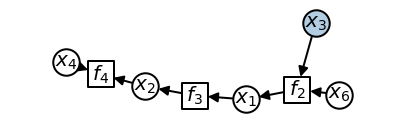

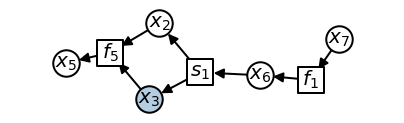

In [16]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(7,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(7,2))